In [4]:
import pickle
with open("REMI-finetune-pk-len256-2from3ins_0,1err_anymeter_v2/learning_curve", 'rb') as file:
    epoch_list, gs_list, loss_list, time_list = pickle.load(file)
len(epoch_list)

1281

In [14]:
time_list[-1] / 3600

13.570717841982841

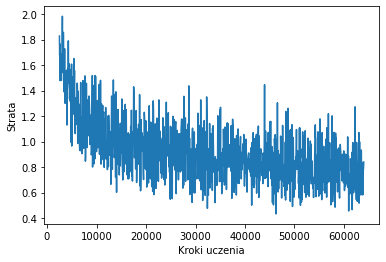

In [11]:
import matplotlib.pyplot as plt
plt.plot(gs_list[50:], loss_list[50:])
plt.ylabel('Strata')
plt.xlabel('Kroki uczenia')
plt.show()

In [2]:
import miditoolkit
midi_obj = miditoolkit.midi.parser.MidiFile(r"D:\Studia\magisterka\Pliki midi\130000_Pop_Rock_Classical_Videogame_EDM_MIDI_Archive[6_19_15]\130000_Pop_Rock_Classical_Videogame_EDM_MIDI_Archive[6_19_15]\P\P\police-englishman_in_new_york.mid")
print(midi_obj.ticks_per_beat)
print(midi_obj.time_signature_changes)
midi_obj.instruments

96
[TimeSignature(numerator=4, denominator=4, time=0)]


[Instrument(program=0, is_drum=True, name=""),
 Instrument(program=45, is_drum=False, name=""),
 Instrument(program=35, is_drum=False, name=""),
 Instrument(program=0, is_drum=False, name=""),
 Instrument(program=69, is_drum=False, name=""),
 Instrument(program=64, is_drum=False, name=""),
 Instrument(program=73, is_drum=False, name=""),
 Instrument(program=73, is_drum=False, name=""),
 Instrument(program=6, is_drum=False, name=""),
 Instrument(program=48, is_drum=False, name=""),
 Instrument(program=119, is_drum=False, name=""),
 Instrument(program=118, is_drum=False, name="")]

In [39]:
import numpy
def sample_with_temperature(logits, temperature, topk):
    probs = numpy.exp(logits / temperature) / numpy.sum(numpy.exp(logits / temperature))
    sorted_index = numpy.argsort(probs)[::-1]
    candi_index = sorted_index[:topk]
    candi_probs = [probs[i] for i in candi_index]
    # normalize probs
    candi_probs /= sum(candi_probs)
    # choose by predicted probs
    prediction = numpy.random.choice(candi_index, size=1, p=candi_probs)[0]
    return prediction
sample_with_temperature(numpy.asarray([0.1, 0.1, 0.6, 0.2]), 1, 2)

[0.21035395 0.21035395 0.34681503 0.23247707]


3

In [41]:
numpy.sort(numpy.asarray([4, 5, 1, 3]))

array([1, 3, 4, 5])

In [214]:
import numpy as np
def sample_with_temperature(probs, temp, k):
    scaled_probability = np.exp(probs / temp) / np.sum(np.exp(probs / temp))
    sorted_index = np.argsort(scaled_probability)
    top_k_index = sorted_index[-k:]
    top_k_probabilities = [scaled_probability[i] for i in top_k_index]
    top_k_probabilities /= sum(top_k_probabilities)
    prediction_index = np.random.choice(top_k_index, size=1, p=top_k_probabilities)[0]
    return prediction_index
sample_with_temperature(np.asarray([0.1, 0.15, 0.5, 0.25]), 1, 3)

2